<div style="border: 1px solid #CCCCFF; border-radius: 1px;">
<div style="margin: 5px">
<b class="alert-heading">Комментарий ревьюера</b>
<p>Роман, привет!</p>
<p>Меня зовут Алексей Секоцкий. Поздравляю с подготовкой очередного проекта. Предлагаю обращаться друг к другу на «ты» если нет возражений. Ниже стандартный блок с условными обозначениями:</p>
<div class="alert alert-success" role="alert">
всё отлично
</div>
<div class="alert alert-warning" role="alert">
рекомендации на будущее (не требующие доработки проекта)
</div>
<div class="alert alert-danger" role="alert">
критичные моменты требующие внимания (доработки)
</div>
<div class="alert alert-info">
информационные комментарии и итоговый
</div>

<hr>
<p>Пожалуйста, не изменяй и не удаляй мои комментарии – они потребуются для повторной проверки (при необходимости). Задавай вопросы и описывай сделанные изменения, помечая их любым удобным наглядным способом.</p>

# Определение возраста покупателей

## Исследовательский анализ данных

Загрузим библиотеки и данные.

<div class="alert alert-warning">
<b>Комментарий ревьюера</b>

Перед отправкой ноутбука на проверку (или сдачей заказчику) рекомендую перезапускать код. Это позволит удостовериться в правильности выполнения всех ячеек.
</div>

In [2]:
import numpy as mp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from tensorflow.keras.layers import Conv2D, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50

In [3]:
faces = pd.read_csv('/datasets/faces/labels.csv')

In [4]:
faces.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [5]:
faces.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
file_name    7591 non-null object
real_age     7591 non-null int64
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


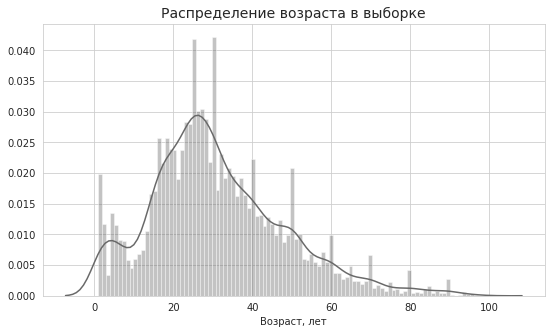

In [6]:
plt.figure(figsize=(9,5))
sns.distplot(faces['real_age'], color='dimgrey', bins=100)
plt.title('Распределение возраста в выборке', size=14)
plt.xlabel('Возраст, лет');

<div class="alert alert-success">
<b>Комментарий ревьюера</b>

Отлично, что задано 100 корзин. Можно увидеть все важные особенности распределения. Что можно сказать про пики на круглые даты? Откуда они могли появиться?
</div>

In [7]:
faces['real_age'].value_counts().head(10)

30    317
25    315
27    229
26    226
28    217
23    213
24    211
18    193
16    193
19    180
Name: real_age, dtype: int64

Датасет содержит информацию о фотографиях людей от 1 года до 100 лет.
Основная часть людей на изображениях в возрасте 20-30 лет c пиками 25 и 30 лет.
Годовалых младенцев больше, чем 10-12 летних детей.
Встречаются повышенное количество людей в возрасте 40, 50, 60, 70, 80, 90 лет.

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=faces,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=10,
        class_mode='raw',
        seed=43)

Found 7591 validated image filenames.


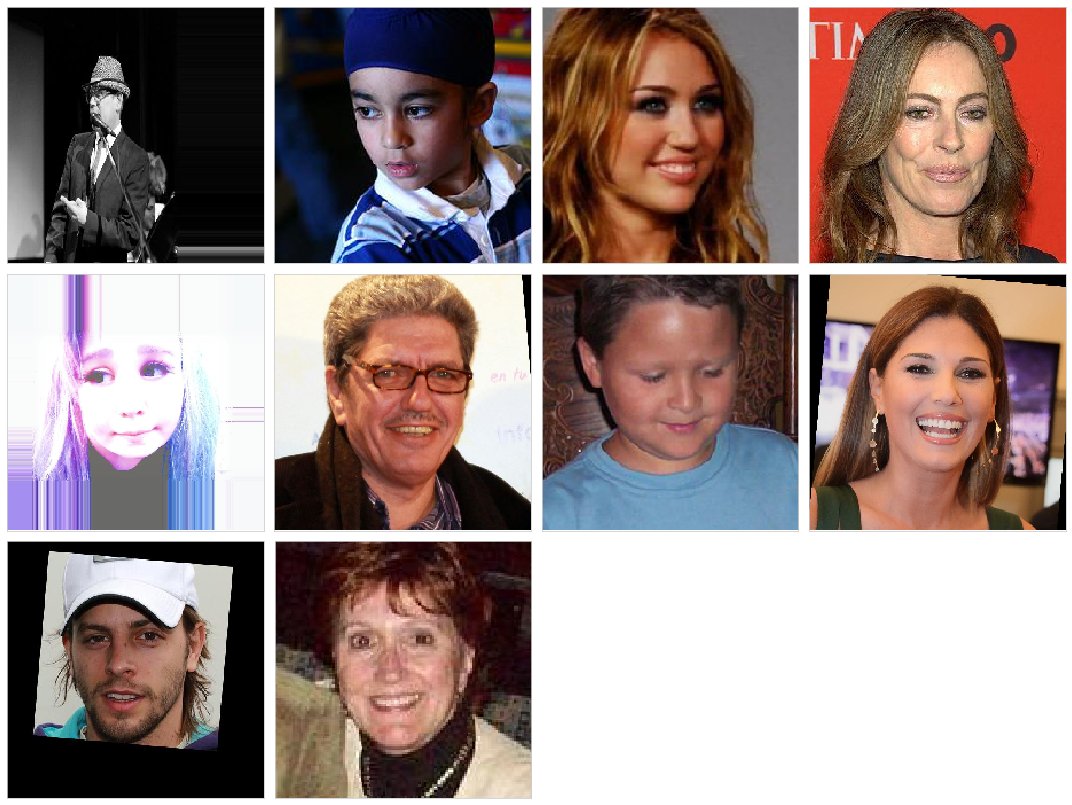

In [13]:
features, target = next(train_gen_flow)

fig = plt.figure(figsize=(15,15))
for i in range(10):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(features[i])

    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

<div class="alert alert-warning">
<b>Комментарий от ревьюера</b>

Можно добавить вывод возраста над каждым фото для визуальной оценки используя `plt.title()`.
</div>

**Вывод**
Выборка содердит 7591 запись.
Целевой признак несбалансирован.
Больше всего людей в возрасте от 20 до 30 лет, в каждой десятилетней группе выделяются "круглые юбиляры".
Выдвину предположение о сдвиги предсказаний модели в сторону "молодых людей" 20-30 лет. И тяготении модели к круглым датам.

<div class="alert alert-success">
<b>Комментарий ревьюера</b>

Отлично, что отмечены пики на круглые даты. Это округления при разметке когда точный возраст был неизвестен.
</div>

<div class="alert alert-danger">
<b>Комментарий от ревьюера</b>

По результатам анализа датасета и фото необходимы следующие уточнения:

1. Пояснения по размеру выборки (большая, маленькая, достаточная) и предложения по работе с датасетом такого размера.
2. Описать особенности увиденные на фото: цветность, качество, размер лиц в кадре, угол поворота и т.п. и предложить аугментацию (при необходимости).
<br/>
</div>

Студент: добавил


1. Размер выборки не очень большой, но достаточный для обучения модели.
2. В данных есть фотографии с наклоном, размеры лиц на фотографиях отличаются, есть фото с недостаточной четкостью и освещением, люди с бородой и посторонние предметы: очки, шапки\шляпы, бижутерия. Это может усложнить работу модели. Большинство фотографий представлены в нормальной цветовой гамме.

<div class="alert alert-success">
<b>Комментарий ревьюера 2</b>

Отличные дополнения! Пики на гистограмме появились в результате округления при разметке когда точный возраст был неизвестен.
</div>

## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.

(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python


def load_train(path):
    df = pd.read_csv('/datasets/faces/labels.csv')
    train_datagen = ImageDataGenerator(
        rescale=1. / 255,
        #vertical_flip=True,
        horizontal_flip=True,
        validation_split=0.2)
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=df,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='training',
        seed=12345)
    return train_gen_flow

def load_test(path):
    df = pd.read_csv('/datasets/faces/labels.csv')
    valid_datagen = ImageDataGenerator(
        rescale=1. / 255,
        validation_split=0.2)
    validation_gen_flow = valid_datagen.flow_from_dataframe(
        dataframe=df,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='validation',
        seed=12345)
    return validation_gen_flow

def create_model(input_shape):
    backbone = ResNet50(input_shape=input_shape,
                        weights='imagenet',
                        include_top=False)
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Flatten())
    model.add(Dense(1, activation='relu'))
    optimizer = Adam(lr=0.0001)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

def train_model(model, train_data, test_data, batch_size=None, epochs=50,
                steps_per_epoch=None, validation_steps=None):
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)  
    return model

```

<div class="alert alert-warning">
<b>Комментарий ревьюера</b>

Код модели скопирован дважды.
</div>

Студент: исправил


<div class="alert alert-success">
<b>Комментарий ревьюера 2</b>

Супер!
</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера</b>

Отлично, что используется аугментация horizontal_flip, однако, vertical_flip не очень подходит  под нашу задачу, вряд ли кто-то в кассовой зоне вверх ногами ходит.    
<hr>
Другие примеры аугментации можно посмотреть в <a href="https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator">документации</a> или в <a href="https://towardsdatascience.com/machinex-image-data-augmentation-using-keras-b459ef87cd22">статье</a>.
</div>

```
2022-01-25 20:16:57.522519: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer.so.6
2022-01-25 20:16:57.524328: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer_plugin.so.6
Using TensorFlow backend.
Found 6073 validated image filenames.
Found 1518 validated image filenames.
2022-01-25 20:17:00.472645: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-01-25 20:17:01.152400: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:8b:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2022-01-25 20:17:01.152518: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-01-25 20:17:01.152552: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-01-25 20:17:01.259387: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2022-01-25 20:17:01.305336: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2022-01-25 20:17:01.698071: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2022-01-25 20:17:01.743829: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2022-01-25 20:17:01.744000: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2022-01-25 20:17:01.748864: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
2022-01-25 20:17:01.749361: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2022-01-25 20:17:01.804910: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2099990000 Hz
2022-01-25 20:17:01.809098: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x3ccbe00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-01-25 20:17:01.809146: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-01-25 20:17:02.032456: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x3f51040 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-01-25 20:17:02.032495: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-SXM2-32GB, Compute Capability 7.0
2022-01-25 20:17:02.035104: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:8b:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2022-01-25 20:17:02.035179: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-01-25 20:17:02.035193: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-01-25 20:17:02.035258: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2022-01-25 20:17:02.035278: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2022-01-25 20:17:02.035297: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2022-01-25 20:17:02.035315: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2022-01-25 20:17:02.035326: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2022-01-25 20:17:02.039884: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
2022-01-25 20:17:02.041887: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-01-25 20:17:06.088129: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1096] Device interconnect StreamExecutor with strength 1 edge matrix:
2022-01-25 20:17:06.088173: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1102]      0 
2022-01-25 20:17:06.088185: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] 0:   N 
2022-01-25 20:17:06.094547: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1241] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 30509 MB memory) -> physical GPU (device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:8b:00.0, compute capability: 7.0)
<class 'tensorflow.python.keras.engine.sequential.Sequential'>
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
Train for 190 steps, validate for 48 steps
Epoch 1/50
2022-01-25 20:17:32.692389: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-01-25 20:17:35.633176: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
190/190 - 68s - loss: 296.3125 - mae: 12.5419 - val_loss: 1073.1559 - val_mae: 28.0327
Epoch 2/50
190/190 - 37s - loss: 104.8966 - mae: 7.7457 - val_loss: 617.9878 - val_mae: 19.2768
Epoch 3/50
190/190 - 37s - loss: 80.1992 - mae: 6.7670 - val_loss: 222.8144 - val_mae: 11.2791
Epoch 4/50
190/190 - 36s - loss: 66.4121 - mae: 6.1974 - val_loss: 135.1393 - val_mae: 8.5973
Epoch 5/50
190/190 - 37s - loss: 53.9317 - mae: 5.5619 - val_loss: 88.9638 - val_mae: 7.2136
Epoch 6/50
190/190 - 37s - loss: 47.0088 - mae: 5.2145 - val_loss: 116.1454 - val_mae: 8.4997
Epoch 7/50
190/190 - 36s - loss: 39.2182 - mae: 4.7555 - val_loss: 120.2276 - val_mae: 8.0553
Epoch 8/50
190/190 - 36s - loss: 32.5561 - mae: 4.3710 - val_loss: 77.9676 - val_mae: 6.6603
Epoch 9/50
190/190 - 37s - loss: 29.1128 - mae: 4.1262 - val_loss: 84.2822 - val_mae: 7.1348
Epoch 10/50
190/190 - 37s - loss: 25.7230 - mae: 3.8974 - val_loss: 87.2702 - val_mae: 6.7699
Epoch 11/50
190/190 - 37s - loss: 23.3743 - mae: 3.6914 - val_loss: 79.9675 - val_mae: 6.9775
Epoch 12/50
190/190 - 36s - loss: 21.8108 - mae: 3.5554 - val_loss: 81.8008 - val_mae: 6.7396
Epoch 13/50
190/190 - 37s - loss: 18.9875 - mae: 3.3537 - val_loss: 76.3160 - val_mae: 6.8193
Epoch 14/50
190/190 - 36s - loss: 17.5633 - mae: 3.1829 - val_loss: 73.4180 - val_mae: 6.3193
Epoch 15/50
190/190 - 37s - loss: 15.6232 - mae: 3.0204 - val_loss: 74.8013 - val_mae: 6.3985
Epoch 16/50
190/190 - 36s - loss: 14.5340 - mae: 2.8711 - val_loss: 68.3737 - val_mae: 6.2210
Epoch 17/50
190/190 - 36s - loss: 12.2397 - mae: 2.6488 - val_loss: 67.3406 - val_mae: 6.1241
Epoch 18/50
190/190 - 37s - loss: 12.8234 - mae: 2.6798 - val_loss: 68.3221 - val_mae: 6.0847
Epoch 19/50
190/190 - 37s - loss: 11.4163 - mae: 2.5798 - val_loss: 69.1048 - val_mae: 6.2944
Epoch 20/50
190/190 - 37s - loss: 11.4806 - mae: 2.5554 - val_loss: 68.9918 - val_mae: 6.1636
Epoch 21/50
190/190 - 36s - loss: 10.8112 - mae: 2.4995 - val_loss: 70.4894 - val_mae: 6.2158
Epoch 22/50
190/190 - 37s - loss: 10.6916 - mae: 2.4954 - val_loss: 68.1936 - val_mae: 6.0992
Epoch 23/50
190/190 - 37s - loss: 10.5895 - mae: 2.4689 - val_loss: 71.7379 - val_mae: 6.4500
Epoch 24/50
190/190 - 36s - loss: 10.4422 - mae: 2.4309 - val_loss: 69.8559 - val_mae: 6.1935
Epoch 25/50
190/190 - 37s - loss: 10.6659 - mae: 2.4765 - val_loss: 68.3049 - val_mae: 6.1440
Epoch 26/50
190/190 - 37s - loss: 10.1826 - mae: 2.4412 - val_loss: 64.7158 - val_mae: 5.8927
Epoch 27/50
190/190 - 37s - loss: 9.5766 - mae: 2.3509 - val_loss: 73.3375 - val_mae: 6.2987
Epoch 28/50
190/190 - 37s - loss: 9.5560 - mae: 2.3469 - val_loss: 67.1564 - val_mae: 6.0060
Epoch 29/50
190/190 - 37s - loss: 9.2580 - mae: 2.3241 - val_loss: 71.3718 - val_mae: 6.4393
Epoch 30/50
190/190 - 37s - loss: 9.1054 - mae: 2.2911 - val_loss: 63.3622 - val_mae: 5.8243
Epoch 31/50
190/190 - 37s - loss: 8.8735 - mae: 2.2664 - val_loss: 66.5102 - val_mae: 6.1340
Epoch 32/50
190/190 - 37s - loss: 9.1103 - mae: 2.2911 - val_loss: 68.9198 - val_mae: 6.1796
Epoch 33/50
190/190 - 37s - loss: 9.2074 - mae: 2.2949 - val_loss: 65.7155 - val_mae: 6.1809
Epoch 34/50
190/190 - 37s - loss: 9.3745 - mae: 2.3377 - val_loss: 66.5515 - val_mae: 6.1484
Epoch 35/50
190/190 - 37s - loss: 9.1764 - mae: 2.2709 - val_loss: 74.0651 - val_mae: 6.5364
Epoch 36/50
190/190 - 37s - loss: 9.2819 - mae: 2.3269 - val_loss: 60.1340 - val_mae: 5.8502
Epoch 37/50
190/190 - 37s - loss: 8.7842 - mae: 2.2424 - val_loss: 62.6540 - val_mae: 6.0117
Epoch 38/50
190/190 - 37s - loss: 8.3385 - mae: 2.1867 - val_loss: 64.6273 - val_mae: 5.9539
Epoch 39/50
190/190 - 37s - loss: 8.0001 - mae: 2.1395 - val_loss: 67.8904 - val_mae: 6.1296
Epoch 40/50
190/190 - 37s - loss: 7.4052 - mae: 2.0661 - val_loss: 73.7431 - val_mae: 6.5070
Epoch 41/50
190/190 - 37s - loss: 7.4864 - mae: 2.0683 - val_loss: 68.7042 - val_mae: 6.1812
Epoch 42/50
190/190 - 37s - loss: 7.1735 - mae: 2.0255 - val_loss: 60.9186 - val_mae: 5.8312
Epoch 43/50
190/190 - 37s - loss: 6.6320 - mae: 1.9517 - val_loss: 62.2685 - val_mae: 5.7830
Epoch 44/50
190/190 - 37s - loss: 6.6916 - mae: 1.9746 - val_loss: 64.1931 - val_mae: 5.8488
Epoch 45/50
190/190 - 36s - loss: 6.9349 - mae: 1.9965 - val_loss: 69.3601 - val_mae: 6.1456
Epoch 46/50
190/190 - 37s - loss: 6.7546 - mae: 1.9442 - val_loss: 93.6403 - val_mae: 7.3845
Epoch 47/50
190/190 - 37s - loss: 6.6499 - mae: 1.9493 - val_loss: 63.7729 - val_mae: 5.9792
Epoch 48/50
190/190 - 37s - loss: 6.4332 - mae: 1.8902 - val_loss: 63.9282 - val_mae: 5.9093
Epoch 49/50
190/190 - 36s - loss: 6.2719 - mae: 1.8853 - val_loss: 62.2519 - val_mae: 5.9071
Epoch 50/50
190/190 - 37s - loss: 6.0217 - mae: 1.8503 - val_loss: 63.2800 - val_mae: 6.0051
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
```

<div class="alert alert-success">
<b>Комментарий ревьюера</b>
На что может указывать значительная разница значений метрики между тренировочной и тестовой (валидационной) выборками?
</div>

## Анализ обученной модели

Цель исследования выполнена: обученная модель демонстрирует показатель MAE = 5.9093 c аугментацией данных.

Исходные данные содержали 7.5 тысяч записей, без пропусков и выбросов. Большинство людей на фотографиях запечетлено в возрастном диапазоне 20-30 лет. Финальная модель содержит архитектуру ResNet и предобученные на ImageNet сверточные слои.

<div class="alert alert-success">
<b>Комментарий ревьюера</b>

Верный вывод. Можно добавить про склонность модели к переобучению (при необходимости).
</div>

<div class="alert alert-info">
<b>Итоговый комментарий ревьюера</b>

Отличный проект. Осталось добавить вывод по фото и размеру выборки. Буду ждать новую версию. Постараюсь быстро проверить.
<hr>
</div>

<div class="alert alert-info">
<b>Итоговый комментарий ревьюера 2</b>

Спасибо за ответственный подход и доработки. Поздравляю с успешной подготовкой проекта. Данная тема достаточно обширная для одного спринта, поэтому мы могли успеть только основы с которыми тебе удалось отлично справиться и подготовиться к дальнейшему погружению в материал. Рекомендую посмотреть материалы <a href="https://docs.yandex.ru/docs/view?url=ya-disk-public%3A%2F%2FExUbgfBho9IqYJiJ%2BSy0DZWIVCbRWq0miszjFmcI001WtMzL9gYiFjQhFvax2xv9MrZMrpRHvcl9PkWNPWglZQ%3D%3D%3A%2Fdeep_learning_notes.pdf&name=deep_learning_notes.pdf">deep_learning_notes</a> и ознакомиться с фреймворком <a href="https://pytorch.org/">PyTorch</a>. Желаю успехов в финальном спринте и профессии!
</div>

## Чек-лист

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Исследовательский анализ данных выполнен
- [x]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [x]  MAE модели не больше 8
- [x]  Код обучения модели скопирован в финальную тетрадь
- [x]  Результат вывода модели на экран перенесён в финальную тетрадь
- [x]  По итогам обучения модели сделаны выводы